In [23]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [24]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [25]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


# Canonical_smiles To secuence

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [27]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [28]:
min_sequence_length = df['canonical_smiles'].apply(len).min()
max_sequence_length = df['canonical_smiles'].apply(len).max()

In [29]:
X = df['canonical_smiles']
y = df['pIC50']

In [30]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Extract canonical smiles from the DataFrame
#canonical_smiles = X.tolist()

# Initialize the Tokenizer
#tokenizer = Tokenizer(char_level=True)

# Fit the tokenizer on the canonical smiles
#tokenizer.fit_on_texts(canonical_smiles)

# Tokenize and pad the canonical smiles sequences
#canonical_smiles_tokenized = tokenizer.texts_to_sequences(canonical_smiles)
#max_sequence_length = max(map(len, canonical_smiles_tokenized))
#canonical_smiles_padded = pad_sequences(canonical_smiles_tokenized, 
                                        #maxlen=max_sequence_length)

# Convert padded sequences to a numpy array
#X_seq_pad = np.array(canonical_smiles_padded)


smiles_data = X.tolist()
labels = y.tolist()

# Tokenize SMILES using Tokenizer
tokenizer = Tokenizer(char_level=True, lower=False)
tokenizer.fit_on_texts(smiles_data)
sequences = tokenizer.texts_to_sequences(smiles_data)
X_seq_pad = pad_sequences(sequences, padding='post') #maxlen=207,

# Convert labels to a numpy array
labels_array = np.array(labels)


In [32]:
X_seq_pad.shape[1]

204

In [33]:
# Find rows with inf values
rows_with_inf = np.any(np.isinf(X_seq_pad), axis=1)

# Remove rows with inf values
X_seq_pad = X_seq_pad[~rows_with_inf]

X_seq_pad.shape

(6157, 204)

In [34]:
X_seq_pad[200]

array([ 8,  1,  5,  1,  7,  1,  3, 13,  1, 10,  1,  5,  2,  2,  2,  2, 10,
        4,  2,  2,  2,  2,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

# Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Convert labels to a numpy array
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, labels_array, test_size=0.2, random_state=999)
X_train = np.delete(X_train,slice(4100,4150),axis=0)
y_train = np.delete(y_train,slice(4100,4150),axis=0)

In [37]:
len(X_train), len(y_train), len(X_test) , len(y_test)

(4875, 4875, 1232, 1232)

# Network Model

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [39]:
# Métrica
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [40]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(list(tokenizer.word_index.keys()))

In [41]:
max_sequence_len = len(max(X_seq_pad, key=len))

# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [42]:
X_train[0]

array([ 2,  2,  6,  2,  3,  9,  6,  4,  2,  5,  9,  2,  3,  2,  4,  6,  1,
        7, 13,  1, 10,  1,  3,  1,  3,  8,  4,  1,  7, 11,  2, 14, 16, 12,
        5,  1,  5,  1,  1,  1,  1,  3,  6,  2,  4,  1,  5,  4,  2,  2,  2,
        2,  2, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, BatchNormalization, Activation, LSTM
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Build the sequential model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_seq_pad.shape[1]))

# Bidirectional LSTM layer with L2 regularization
model.add(Bidirectional(LSTM(125, return_sequences=False, kernel_regularizer=l2(0.01))))

# Dense layer with L2 regularization
model.add(Dense(1000, kernel_regularizer=l2(0.01)))

# Batch normalization layer
model.add(BatchNormalization())

# Activation layer
model.add(Activation('relu'))

# Output dense layer
model.add(Dense(1))

# Print the model summary
model.summary()

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.01, clipvalue=0.1), loss='mse', metrics=[R2])




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 204, 128)          4992      
                                                                 
 bidirectional_1 (Bidirecti  (None, 250)               254000    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 1000)              251000    
                                                                 
 batch_normalization_1 (Bat  (None, 1000)              4000      
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [45]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [ ]:
#history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[mcp])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping,mcp])

In [46]:
y_pred = model.predict(X_test)

39/39 [==============================] - 4s 61ms/step


# Score

In [47]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [48]:
r2
# 0.4984533246797399

0.5760536703686228

In [31]:
model.save('models/test_1.h5', )

/home/nando/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load model (solo si se grabo el modelo)

In [50]:
from tensorflow.keras.models import load_model

In [57]:
model_loaded = load_model('models/embed_64_bi_lstm_100_dense_50_bn.h5', custom_objects={'R2': R2})

In [58]:
y_pred = model_loaded.predict(X_test)

39/39 [==============================] - 3s 49ms/step


¿Hasta que valores de r2 logró?

In [59]:
r2 = 1 - ((y_test - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.591830600979623

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

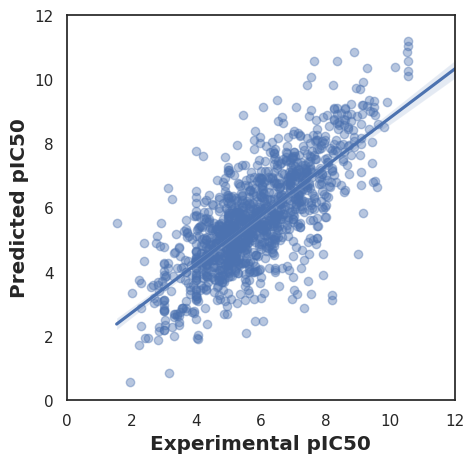

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show